# Genetic Algorithm for eil51

#### eil51

In [3]:
coordinates = [
    (37, 52), (49, 49), (52, 64), (20, 26), (40, 30), (21, 47), (17, 63), (31, 62),
    (52, 33), (51, 21), (42, 41), (31, 32), (5, 25), (12, 42), (36, 16), (52, 41),
    (27, 23), (17, 33), (13, 13), (57, 58), (62, 42), (42, 57), (16, 57), (8, 52),
    (7, 38), (27, 68), (30, 48), (43, 67), (58, 48), (58, 27), (37, 69), (38, 46),
    (46, 10), (61, 33), (62, 63), (63, 69), (32, 22), (45, 35), (59, 15), (5, 6),
    (10, 17), (21, 10), (5, 64), (30, 15), (39, 10), (32, 39), (25, 32), (25, 55),
    (48, 28), (56, 37), (30, 40)
]

In [4]:
import time
import random
import math
import matplotlib.pyplot as plt

#### structure city coordinates

In [6]:
def getCity():
    cities = [(i, x, y) for i, (x, y) in enumerate(coordinates)]
    return cities

#### calculate distance between cities

In [8]:
def calcDistance(cities):
    total_sum = 0
    for i in range(len(cities) - 1):
        cityA = cities[i]
        cityB = cities[i + 1]

        d = math.sqrt(
            math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2)
        )

        total_sum += d

    cityA = cities[0]
    cityB = cities[-1]
    d = math.sqrt(math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2))

    total_sum += d

    return total_sum

#### selecting the population

In [10]:
def selectPopulation(cities, size):
    population = []

    for i in range(size):
        c = cities.copy()
        random.shuffle(c)
        distance = calcDistance(c)
        population.append([distance, c])
    fitest = sorted(population)[0]

    return population, fitest

#### genetic algorithm

In [12]:
def geneticAlgorithm(
    population,
    lenCities,
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
    TARGET,
):
    gen_number = 0
    for i in range(500):
        new_population = []

        # selecting two of the best options we have (elitism)
        new_population.append(sorted(population)[0])
        new_population.append(sorted(population)[1])

        for i in range(int((len(population) - 2) / 2)):
            # CROSSOVER
            random_number = random.random()
            if random_number < CROSSOVER_RATE:
                parent_chromosome1 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]

                parent_chromosome2 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]

                point = random.randint(0, lenCities - 1)

                child_chromosome1 = parent_chromosome1[1][0:point]
                for j in parent_chromosome2[1]:
                    if (j in child_chromosome1) == False:
                        child_chromosome1.append(j)

                child_chromosome2 = parent_chromosome2[1][0:point]
                for j in parent_chromosome1[1]:
                    if (j in child_chromosome2) == False:
                        child_chromosome2.append(j)

            # If crossover not happen
            else:
                child_chromosome1 = random.choices(population)[0][1]
                child_chromosome2 = random.choices(population)[0][1]

            # MUTATION
            if random.random() < MUTATION_RATE:
                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome1[point1], child_chromosome1[point2] = (
                    child_chromosome1[point2],
                    child_chromosome1[point1],
                )

                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome2[point1], child_chromosome2[point2] = (
                    child_chromosome2[point2],
                    child_chromosome2[point1],
                )

            new_population.append([calcDistance(child_chromosome1), child_chromosome1])
            new_population.append([calcDistance(child_chromosome2), child_chromosome2])

        population = new_population

        gen_number += 1

        if gen_number % 10 == 0:
            print(gen_number, sorted(population)[0][0])

        if sorted(population)[0][0] < TARGET:
            break

    answer = sorted(population)[0]

    return answer, gen_number

#### plot

In [14]:
def drawMap(city, answer):
    for j in city:
        plt.plot(j[1], j[2], "ro")
        plt.annotate(j[0], (j[1], j[2]))

    for i in range(len(answer[1])):
        try:
            first = answer[1][i]
            secend = answer[1][i + 1]

            plt.plot([first[1], secend[1]], [first[2], secend[2]], "gray")
        except:
            continue

    first = answer[1][0]
    secend = answer[1][-1]
    plt.plot([first[1], secend[1]], [first[2], secend[2]], "gray")

    plt.show()

In [15]:
def simulate():
    # initial values
    POPULATION_SIZE = 1000
    TOURNAMENT_SELECTION_SIZE = 4
    MUTATION_RATE = 0.1
    CROSSOVER_RATE = 0.9
    TARGET = 426.0

    cities = getCity()
     
    start_time = time.process_time()  # Record the CPU time at the start
    
    firstPopulation, firstFitest = selectPopulation(cities, POPULATION_SIZE)
    answer, genNumber = geneticAlgorithm(
        firstPopulation,
        len(cities),
        TOURNAMENT_SELECTION_SIZE,
        MUTATION_RATE,
        CROSSOVER_RATE,
        TARGET,
    )
    end_time = time.process_time()  # Record the CPU time at the end
    elapsed_time = end_time - start_time  # Calculate elapsed time
    print(f"CPU Time: {elapsed_time:.4f} seconds")  # Display the CPU time
    print("Generation: " + str(genNumber))
    print("Fittest chromosome distance before training: " + str(firstFitest[0]))
    print("Fittest chromosome distance after training: " + str(answer[0]))
    print("Target distance: " + str(TARGET))

    drawMap(cities, answer)

## Implementation

#### execution 1

10 1044.2493414286012
20 882.726982379949
30 765.325392260567
40 702.7269005142782
50 673.9890233006279
60 641.8095675433808
70 624.8391996416864
80 605.6858405384124
90 577.5814519228187
100 568.834440970834
110 553.8933902380745
120 546.3731373589511
130 543.5241712834854
140 534.2243045570358
150 533.3828682266725
160 530.3700323875014
170 525.8626992042458
180 525.8626992042458
190 525.8626992042458
200 523.924983646593
210 520.8945221730938
220 519.8224838805479
230 519.8224838805479
240 519.8224838805479
250 519.8224838805479
260 519.8224838805479
270 519.8224838805479
280 519.8224838805479
290 519.8224838805479
300 519.8224838805479
310 519.8224838805479
320 519.8224838805479
330 519.8224838805479
340 519.8224838805479
350 519.8224838805479
360 519.8224838805479
370 519.8224838805479
380 519.8224838805479
390 519.8224838805479
400 519.8224838805479
410 519.8224838805479
420 519.8224838805479
430 519.8224838805479
440 519.8224838805479
450 519.8224838805479
460 519.8224838805479


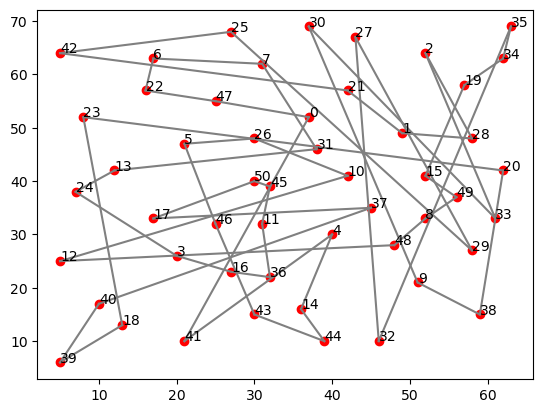

In [18]:
simulate()

#### execution 2

10 1091.265019106902
20 827.6230881116032
30 726.9513899862822
40 662.8307731638153
50 601.1152715709021
60 586.6977488931491
70 558.28554139801
80 526.7230836814134
90 513.9283264122926
100 513.062953628734
110 510.4968987792403
120 510.3236585334831
130 505.4221953767266
140 502.85614052723287
150 502.1596750742155
160 494.77378217211816
170 494.2391523740909
180 494.12858887613845
190 494.12858887613845
200 494.12858887613845
210 494.12858887613845
220 494.12858887613845
230 493.5930227010123
240 493.5930227010123
250 493.5930227010123
260 493.5930227010123
270 493.5930227010123
280 493.5930227010123
290 493.5930227010123
300 493.5930227010123
310 493.5930227010123
320 493.5930227010123
330 493.5930227010123
340 493.5930227010123
350 493.5930227010123
360 493.5930227010123
370 493.5930227010123
380 493.5930227010123
390 493.5930227010123
400 493.5930227010123
410 493.5930227010123
420 493.5930227010123
430 493.5930227010123
440 493.5930227010123
450 493.5930227010123
460 493.5930227

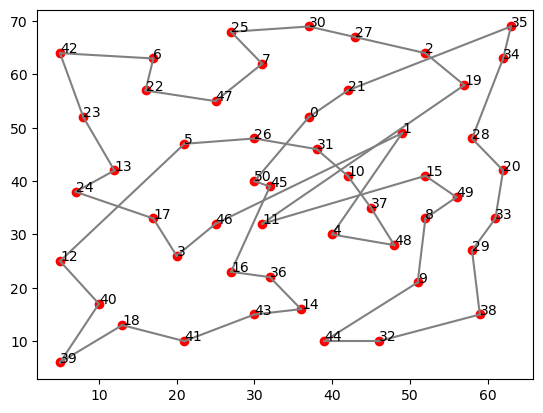

In [20]:
simulate()

#### execution 3

10 989.31124246117
20 821.1675199122791
30 738.1727315788308
40 671.7079401873794
50 622.7043536398417
60 582.171557226699
70 558.4188507883791
80 546.6241198170563
90 541.7098355252464
100 531.1909364578511
110 517.6438316301764
120 516.7784588466178
130 516.7784588466178
140 516.7784588466178
150 510.9601489233039
160 510.3542220291896
170 510.3542220291896
180 510.25070222389616
190 508.23031616599303
200 508.23031616599303
210 508.23031616599303
220 508.23031616599303
230 508.23031616599303
240 508.23031616599303
250 508.23031616599303
260 506.50199851309844
270 506.50199851309844
280 506.50199851309844
290 506.50199851309844
300 506.50199851309844
310 506.50199851309844
320 506.50199851309844
330 506.50199851309844
340 506.50199851309844
350 506.50199851309844
360 506.50199851309844
370 506.50199851309844
380 506.50199851309844
390 506.50199851309844
400 506.50199851309844
410 506.50199851309844
420 506.50199851309844
430 506.50199851309844
440 506.50199851309844
450 506.501998513

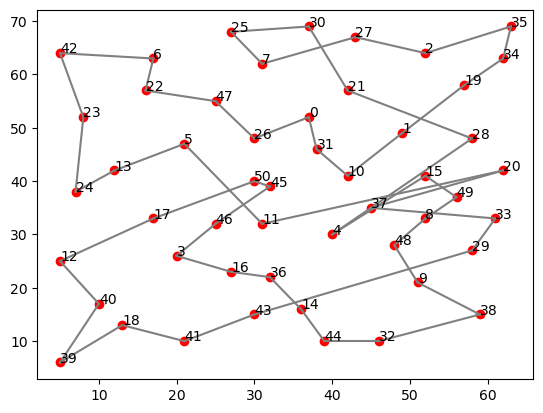

In [22]:
simulate()

#### execution 4

10 1074.8973299311483
20 955.963539097485
30 855.9805509148648
40 821.2407180105704
50 769.1592187210547
60 725.6967665768939
70 694.4048950953515
80 675.3972761212951
90 656.4425815577715
100 645.0185156156313
110 631.9856990329736
120 630.8760964098697
130 630.5834384642654
140 625.912755726923
150 616.8036463240321
160 616.2874575268934
170 612.351785986813
180 612.351785986813
190 612.351785986813
200 612.351785986813
210 612.351785986813
220 611.6539478933428
230 611.6539478933428
240 611.6539478933428
250 608.7868725142667
260 608.7868725142667
270 608.7868725142667
280 608.7868725142667
290 608.7868725142667
300 608.7868725142667
310 608.7868725142667
320 608.7868725142667
330 608.7868725142667
340 608.7868725142667
350 608.7868725142667
360 607.8202880874097
370 607.8202880874097
380 607.8202880874097
390 607.8202880874097
400 607.8202880874097
410 607.8202880874097
420 607.8202880874097
430 607.8202880874097
440 607.8202880874097
450 607.8202880874097
460 607.8202880874097
470

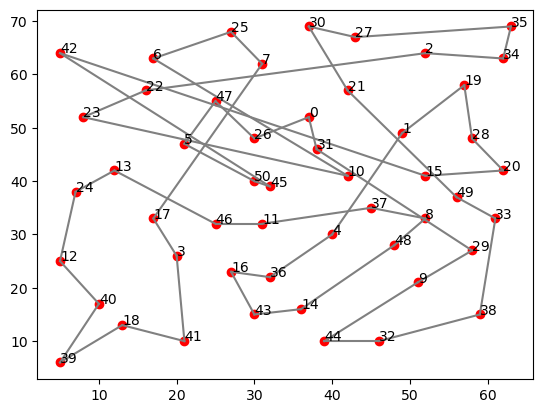

In [24]:
simulate()

#### execution 5

10 1042.2581361121695
20 899.8224612156806
30 798.8465798461093
40 748.3077274613713
50 715.5415769597532
60 691.9198036870081
70 653.3942156960169
80 613.2939628448939
90 597.2662878382447
100 582.9015458362832
110 558.5868157048646
120 558.4882908997467
130 551.2311311245002
140 546.9913057648404
150 542.8552712470553
160 541.9898984634968
170 540.183700115002
180 538.5343861614547
190 538.5343861614547
200 532.6845751174335
210 532.6845751174335
220 532.6845751174335
230 527.5859649901273
240 527.5859649901273
250 527.5859649901273
260 527.5859649901273
270 527.5859649901273
280 520.5917333002326
290 519.9739880447538
300 519.9739880447538
310 519.9739880447538
320 519.9739880447538
330 519.9739880447538
340 519.9739880447538
350 519.9739880447538
360 519.9739880447538
370 519.9739880447538
380 519.9739880447538
390 519.9739880447538
400 519.9739880447538
410 519.9739880447538
420 519.9739880447538
430 519.9739880447538
440 519.9739880447538
450 519.9739880447538
460 519.97398804475

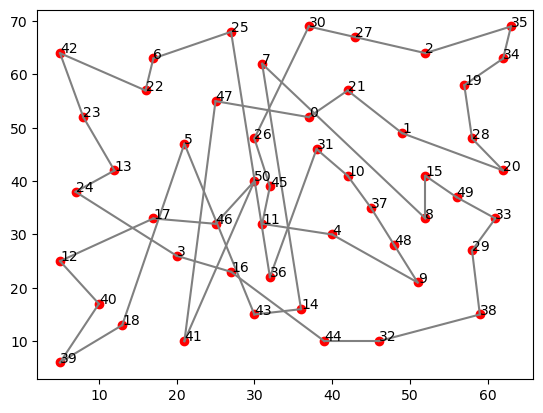

In [26]:
simulate()

#### execution 6

10 1040.2041767965322
20 878.5690973717777
30 792.9105948928642
40 736.3562532752956
50 705.8544298401932
60 683.8438685704914
70 661.6029783590377
80 644.9408561970373
90 632.3900122501053
100 627.5533269701441
110 611.4704461882881
120 586.1096681163514
130 581.5629656397485
140 577.7483440951752
150 573.4684899362586
160 568.1282037011036
170 564.8935305711788
180 561.4678046493763
190 561.1634908867671
200 561.1634908867671
210 561.1634908867671
220 561.1634908867671
230 561.1634908867671
240 560.5664758773338
250 560.5664758773338
260 560.5664758773338
270 560.5664758773338
280 560.5664758773338
290 560.5664758773338
300 560.5664758773338
310 560.5664758773338
320 560.5664758773338
330 560.5664758773338
340 560.5664758773338
350 560.5664758773338
360 560.5664758773338
370 560.5664758773338
380 560.5664758773338
390 560.5664758773338
400 560.5664758773338
410 560.5664758773338
420 560.5664758773338
430 560.5664758773338
440 560.5664758773338
450 560.5664758773338
460 560.5664758773

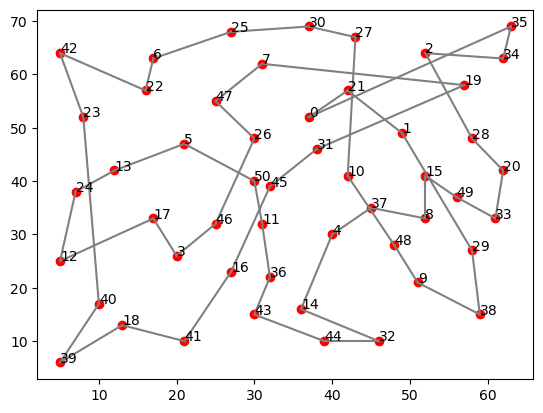

In [28]:
simulate()

#### execution 7

10 1056.9691305100362
20 929.9107631043644
30 816.5046464528359
40 737.1816786762595
50 662.9240810582965
60 623.2688666501606
70 613.9724063925629
80 606.6337840245425
90 598.2225878963789
100 594.5319543102798
110 585.9216997730712
120 575.6008123215227
130 571.9666599244504
140 571.1012871408918
150 571.1012871408918
160 570.5726424375902
170 569.4883537888675
180 569.4883537888675
190 560.1694240155633
200 552.3775501680226
210 551.4502216036807
220 549.9049439830834
230 549.9049439830834
240 549.9049439830834
250 549.9049439830834
260 549.304442687804
270 549.1960040417865
280 547.8549024328937
290 547.8549024328937
300 547.8549024328937
310 547.8549024328937
320 547.8549024328937
330 547.8549024328937
340 547.8549024328937
350 547.8549024328937
360 547.8549024328937
370 547.8549024328937
380 547.8549024328937
390 547.8549024328937
400 547.8549024328937
410 547.8549024328937
420 547.4324759935474
430 547.4324759935474
440 547.4324759935474
450 547.4324759935474
460 547.43247599354

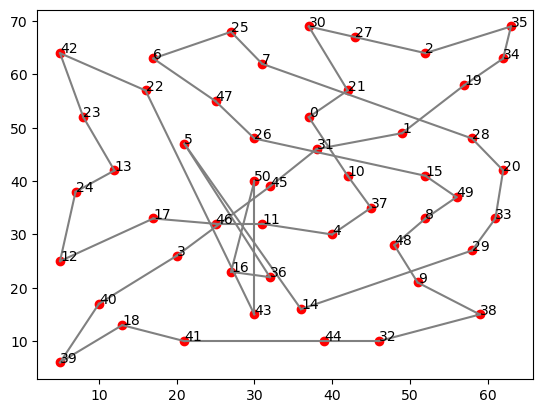

In [30]:
simulate()

#### execution 8

10 1026.0643138569556
20 890.6971685469524
30 778.9873420825593
40 762.8859316514026
50 707.4807236431861
60 664.3742674352412
70 627.3624475579454
80 601.2343778644439
90 582.6723822743647
100 567.5002472515768
110 550.1365666985563
120 549.3119157682224
130 537.7702185133126
140 537.7702185133126
150 537.7702185133126
160 537.7702185133126
170 537.7702185133126
180 537.7702185133126
190 537.7702185133126
200 537.7702185133126
210 537.7702185133126
220 537.7702185133126
230 537.7702185133126
240 537.7702185133126
250 537.7702185133126
260 537.7702185133126
270 537.7702185133126
280 537.7702185133126
290 537.7702185133126
300 537.7702185133126
310 537.7702185133126
320 537.7702185133126
330 537.7702185133126
340 537.7702185133126
350 537.7702185133126
360 537.7702185133126
370 537.7702185133126
380 537.7702185133126
390 537.7702185133126
400 537.7702185133126
410 537.7702185133126
420 537.7702185133126
430 530.782465373968
440 525.2781890694652
450 525.1154577354184
460 523.68632603611

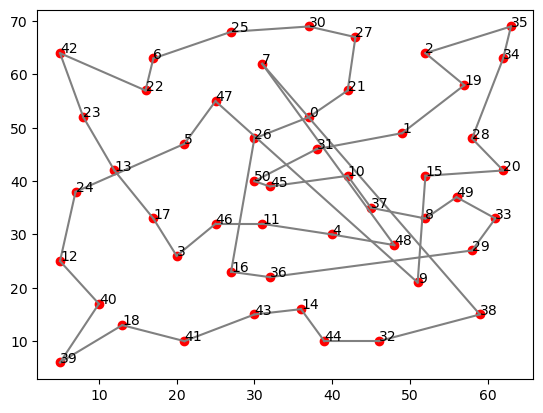

In [32]:
simulate()

#### execution 9

10 1074.5730687652374
20 906.8489623854686
30 811.2688783105096
40 754.9248152270209
50 700.2780369449767
60 665.5843605842513
70 647.7107315807639
80 623.5193803567793
90 614.0670177719369
100 608.515861490908
110 596.394651969553
120 578.7048951419337
130 577.4768690168539
140 570.0998357288572
150 566.7098876574782
160 562.6370723326407
170 559.9809210044021
180 551.513204536078
190 534.0618204231456
200 519.1164174647447
210 515.073145655394
220 506.53126568523413
230 498.794337313057
240 495.8984238411783
250 493.3931727657278
260 493.3931727657278
270 493.3931727657278
280 493.3931727657278
290 493.1187630865198
300 490.28476018873516
310 490.28476018873516
320 490.28476018873516
330 490.28476018873516
340 490.28476018873516
350 489.11298630754595
360 489.11298630754595
370 489.11298630754595
380 489.11298630754595
390 489.11298630754595
400 489.11298630754595
410 489.11298630754595
420 489.11298630754595
430 489.11298630754595
440 489.11298630754595
450 489.11298630754595
460 48

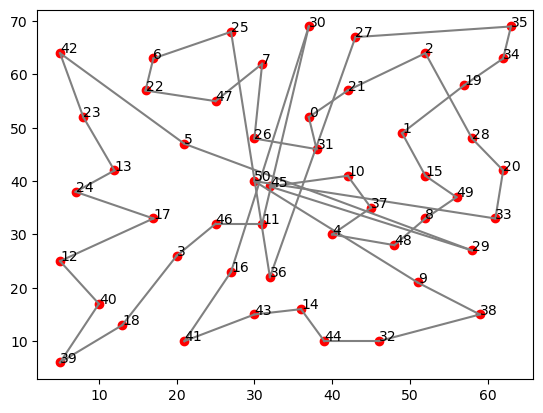

In [34]:
simulate()

#### execution 10

10 971.1693355969632
20 774.1332948419101
30 698.9060358777409
40 630.5966412920114
50 594.8966611425611
60 574.9583978409718
70 568.7633656991875
80 556.1337261859632
90 549.6780616896539
100 538.3572287956159
110 530.9100860927551
120 530.9100860927551
130 522.166968828983
140 517.1331628855157
150 512.2581199857775
160 506.4600141939168
170 502.2389035903028
180 498.7433248369931
190 498.7433248369931
200 496.77956257091535
210 496.77956257091535
220 496.77956257091535
230 495.5169885090408
240 489.86920763713744
250 488.94405008052246
260 488.94405008052246
270 486.9123470525788
280 486.9123470525788
290 486.9123470525788
300 486.7173656502755
310 486.7173656502755
320 486.7173656502755
330 486.7173656502755
340 471.5973427264909
350 471.5973427264909
360 471.5973427264909
370 471.5973427264909
380 471.5973427264909
390 471.5973427264909
400 471.5973427264909
410 471.5973427264909
420 471.5973427264909
430 471.5973427264909
440 471.5973427264909
450 471.5973427264909
460 471.597342

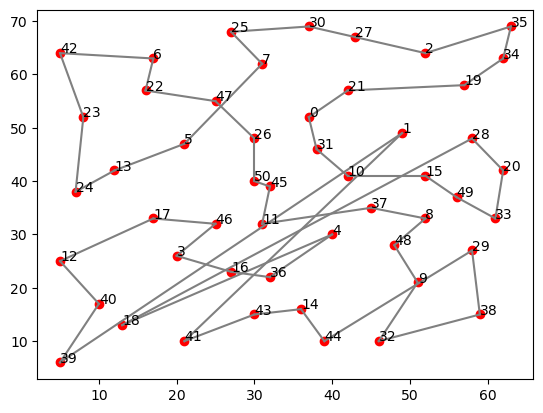

In [36]:
simulate()